In [1]:

# !pip install ipympl
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from functools import partial
from typing import Tuple

np.random.seed(52)

In [2]:
# define functions to define basis vectors, check their independence and function to project onto lower dimension space
def _check_for_independence(X: np.ndarray) -> bool:
    return all(np.cross(X[:, 0], X[:, 1]) != np.zeros(3))


def _low_dim_project(high_dim_data: np.ndarray, basis_vectors: np.ndarray) -> np.ndarray:
    if high_dim_data.shape[1] != basis_vectors.shape[0]:
        raise ValueError("Cannot project with unequal dims")
    
    return np.dot(high_dim_data, basis_vectors)

def _orthonormal_basis(X: np.ndarray) -> np.ndarray:
    # this is just for (3,2)

    if _check_for_independence:
        u1 = X[:, 0] / np.linalg.norm(X[:, 0])
        u2 = X[:, 1] - ((np.dot(X[:, 1], u1)) * u1)

        u2 = u2 / np.linalg.norm(u2)
        return np.array([u1, u2]).T

    raise ValueError("Cannot orthonormalise dependent vectors")

In [3]:
# define methods to plot and animate
# define dual axes, axes[0]-> for high dim projections axes[1]-> for low dim projections


def define_colors(data: np.ndarray):
    # colors = np.random.rand(data.shape[0])
    cmap = plt.get_cmap("viridis")
    colors = cmap(np.linspace(0, 1, data.shape[0]))
    return colors

colors_vec = ["blue", "red"]

def init(basis_vectors: np.ndarray, X: np.ndarray, proj_data: np.ndarray, axes: Tuple):
    axes[0].cla()
    axes[1].cla()
    axes[0].set_xlabel("x-axis")
    axes[0].set_ylabel("y-axis")
    axes[0].set_zlabel("z-axis")

    axes[0].set_xlim([0, np.max(X[:, 0])])
    axes[0].set_ylim([0, np.max(X[:, 1])])
    axes[0].set_zlim([0, np.max(X[:, 2])])
    axes[0].set_title('3D data')

    for i in range(basis_vectors.shape[1]):
        axes[1].quiver(0,
                0,
                0,
                basis_vectors[:, i][0],
                basis_vectors[:, i][1],
                basis_vectors[:, i][2],
                    color=colors_vec[i],
                    arrow_length_ratio=0.2,
                    linestyles="solid")
        
    axes[1].set_xlabel("X Axis")
    axes[1].set_ylabel("Y Axis")
    axes[1].set_zlabel("Z Axis")
    axes[1].set_title('dimension reduced 2D projections')

    axes[1].set_xlim(0, np.max(proj_data[:,0]))
    axes[1].set_ylim(0,np.max(proj_data[:,1]))
    axes[1].set_zlim(0,1)
    return ()

def animate(frame, X: np.ndarray, proj_data: np.ndarray, axes: Tuple):
    colors = define_colors(data=X)
    three_d_data = X[0:frame+1, :]
    two_d_proj_data = proj_data[0: frame+1, :]
    for j in range(frame):
        axes[0].quiver(0,0,0, three_d_data[j, 0], three_d_data[j, 1], three_d_data[j, 2],color=colors[j],
            arrow_length_ratio=0.1,
            linestyles="solid")
        
        axes[1].scatter(xs=two_d_proj_data[j, 0], ys = two_d_proj_data[j , 1], zs=0, c=colors[j], marker='x', label='2d projections')


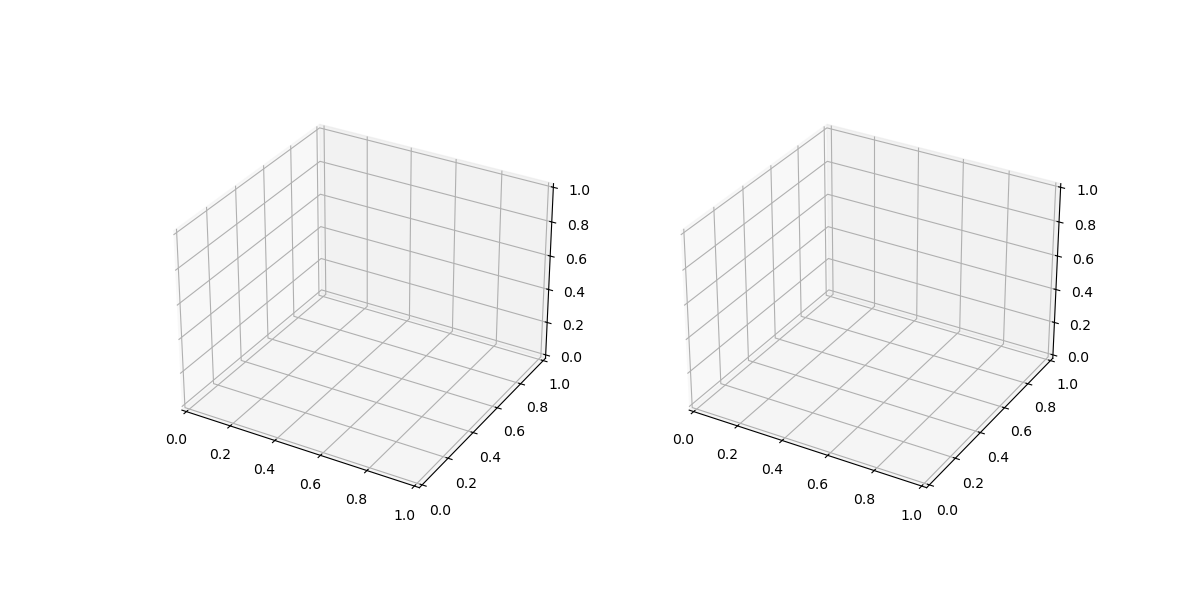

In [4]:
# client

basis_vectors = np.array([[1, 0], [0, 1], [0, 0]])
# basis_vectors = _orthonormal_basis(X=np.random.rand(3,2))
rand_3d_matrix = np.random.rand(100, 3)
projected_data = _low_dim_project(high_dim_data=rand_3d_matrix, basis_vectors=basis_vectors)

fig, (axl, axr) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12,6))

init_pars = partial(init, basis_vectors=basis_vectors, X=rand_3d_matrix, proj_data=projected_data, axes=(axl, axr))
animate_pars = partial(animate, X=rand_3d_matrix, proj_data=projected_data, axes=(axl, axr))

ani = FuncAnimation(fig=fig, func=animate_pars, frames=50, interval=300, init_func=init_pars)
# ani.save("animation.gif")
plt.show()